array('d', [1.0, 3.0]) array('d', [1.0, 3.0])


/home/patricio-linux/.local/lib/python3.10/site-packages/shapely/geometry/linestring.py:244: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  m = len(ob)
/home/patricio-linux/.local/lib/python3.10/site-packages/shapely/geometry/linestring.py:265: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  n = len(_coords(ob[0]))
/home/patricio-linux/.local/lib/python3.10/site-packages/shapely/geometry/linestring.py:283: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  coords = _coords(ob[i])


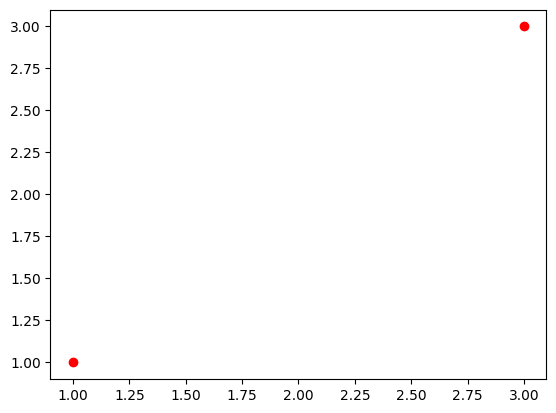

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Definir las coordenadas de dos líneas que se intersectan
X1 = [1, 2, 3, 4]
Y1 = [1, 2, 3, 4]
X2 = [1, 3, 3, 3]
Y2 = [1, 2, 3, 0]

# Crear las líneas utilizando Shapely
first_line = LineString(np.column_stack((X1, Y1)))
second_line = LineString(np.column_stack((X2, Y2)))

# Encontrar la intersección
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'ro')
    print(*LineString(intersection).xy)


In [6]:
import sympy
from sympy import Derivative, simplify, Piecewise, Min, Max, integrate, pycode, parse_expr, solve
import scipy
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import multiprocessing as mp
from shapely.geometry import LineString



# Eequilibrio buscado
b2_v = 0.4

y2, p2, q2, b2, r = sympy.symbols('y2 p2 q2 b2 r', real=True, positive=True)
t2 = sympy.symbols('t2', positive=True)

g2 = 3*(1-t2)*(y2-1)**2 + 3*t2*y2**2

## p*q > b barra 
vf2_1 = integrate(Min(y2/q2,1)*g2,(y2,0,1))

## p*q < b barra y p >= b barra
vf2_2 = integrate(Min(p2*y2/b2,1)*g2,(y2,0,1))

## p*q < b barra y p < b barra
vf2_3 = integrate(p2*y2/b2*g2,(y2,0,1))



# theta gorro
## p*q > b barra 
tgorro2_1 = solve(vf2_1 - p2/(p2+r),t2)[0]
tgorro2_1n = solve(vf2_1 - p2,t2)[0]

## p*q < b barra y p >= b barra
tgorro2_2 = solve(vf2_2 - p2/(p2+r),t2)[0]
tgorro2_2n = solve(vf2_2 - p2,t2)[0]

## p*q < b barra y p < b barra
tgorro2_3 = solve(vf2_3 - p2/(p2+r),t2)[0]
tgorro2_3n = solve(vf2_3 - p2,t2)[0]


d2 = Piecewise((1 - r/(p2 +r)*tgorro2_2, (p2 + r <= 1)), (1-tgorro2_2n,True))
d2 = Max(0,Min(1,d2))
d3 = Piecewise((1/(p2+r)*tgorro2_2, (p2 + r <= 1)), (0, True)) # Ya está dividido en r
d3 = Max(0,Min(1,d3))
# print(d2)
# sympy.plot(d2.subs([(r,0.2),(b2,b2_v),(q2,0.4)]),(p2,0,1))

u2 = integrate(Max(0,Min(1,p2*q2/b2)*y2- q2)*g2.subs(t2,1),(y2,0,1))
u3 = Min(q2,d3)*(r - integrate((1-Min(1,p2/b2*y2))*9*y2**8,(y2,0,1)))

deru3_1 = Derivative(d3*(r - integrate((1-Min(1,p2/b2*y2))*9*y2**8,(y2,0,1))),r)
solve(deru3_1.subs([(b2,b2_v),(p2,0.5)]).doit(),r)

NotImplementedError: multiple generators [r, Heaviside(-499199999999999*r/(-896000000000000*r**2 - 896000000000000*r - 224000000000000) + 1 + 344/(-560*r**2 - 560*r - 140)), Heaviside(Min(1, 499199999999999*r/(-896000000000000*r**2 - 896000000000000*r - 224000000000000) - 344/(-560*r**2 - 560*r - 140))), Max(0, Min(1, 499199999999999*r/(-896000000000000*r**2 - 896000000000000*r - 224000000000000) - 344/(-560*r**2 - 560*r - 140)))]
No algorithms are implemented to solve equation (r - 131072/9765625)*(-5*(499199999999999*r/1000000000000000 - 344/625)/(8*(-14*r/25 - 7/25)*(r + 1/2)**2) + 39/(125*(-14*r/25 - 7/25)*(r + 1/2)) + 125*(499199999999999*r/1000000000000000 - 344/625)/(112*(-r - 1/2)**2*(r + 1/2)))*Heaviside(1 - 5*(499199999999999*r/1000000000000000 - 344/625)/(8*(-14*r/25 - 7/25)*(r + 1/2)))*Heaviside(Min(1, 5*(499199999999999*r/1000000000000000 - 344/625)/(8*(-14*r/25 - 7/25)*(r + 1/2)))) + Max(0, Min(1, 5*(499199999999999*r/1000000000000000 - 344/625)/(8*(-14*r/25 - 7/25)*(r + 1/2))))